In [25]:
import pandas as pd
df = pd.read_csv('./training.csv', encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [26]:
df.columns = ['sentiment', 'id', 'datetime', 'query', 'username', 'tweet']
df = df.drop(['id', 'datetime', 'query', 'username'], axis=1)
df.head()

,sentiment,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [27]:
label_to_sentiment = {0:'Negative', 4:'Positive'}
def mapper(label):
     return label_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: mapper(x))
df.sentiment.head()

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: sentiment, dtype: object

<BarContainer object of 2 artists>

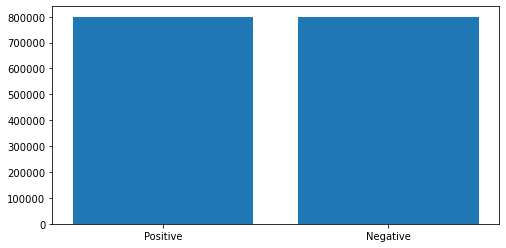

In [28]:
import matplotlib.pyplot as plt
dist = df.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(dist.index, dist.values)

In [29]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ojass\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
import re
text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

def clean_tweets(text, stem=False):    
    text = re.sub(text_cleaning_regex, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token in stop_words:
            continue
        if stem:
            tokens.append(stemmer.stem(token))
        else:
            tokens.append(token)
    return " ".join(tokens)

df.tweet = df.tweet.apply(lambda x: clean_tweets(x))
df.head()

,sentiment,tweet
0,Negative,upset update facebook texting might cry result...
1,Negative,kenichan dived many times ball managed save 50...
2,Negative,whole body feels itchy like fire
3,Negative,nationwideclass behaving mad see
4,Negative,kwesidei whole crew


In [31]:
# Import functions from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2,random_state=16)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1279999
Test Data size 320000


In [32]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)
word_index = tokenizer.word_index
print(word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 565903


In [34]:
from keras.preprocessing.sequence import pad_sequences
# The tokens are converted into sequences and then passed to the pad_sequences() function
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet),maxlen = 30)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet),maxlen = 30)

In [35]:
labels = ['Negative', 'Positive']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())
y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(x_train, x_test, y_train, y_test)

[[     0      0      0 ...      0  68478    851]
 [     0      0      0 ...     11   1109    664]
 [     0      0      0 ... 188742    510    187]
 ...
 [     0      0      0 ...    121   1493    294]
 [     0      0      0 ...     78    273    615]
 [     0      0      0 ...     66  76815   3020]] [[     0      0      0 ...    310    219 137847]
 [     0      0      0 ...     63     64     63]
 [     0      0      0 ...    475    450    936]
 ...
 [     0      0      0 ...   1973   3013    171]
 [     0      0      0 ... 242501   1078    261]
 [     0      0      0 ...      0      0    713]] [[1]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]] [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [36]:
import numpy as np
embeddings_index = {}
# opening the downloaded glove embeddings file
f = open('./glove.6B.300d.txt', encoding="utf-8")
for line in f:
    # For each line file, the words are split and stored in a list
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [37]:
# creating an matrix with zeroes of shape vocab x embedding dimension
embedding_matrix = np.zeros((vocab_size, 300))
# Iterate through word, index in the dictionary
for word, i in word_index.items():
    # extract the corresponding vector for the vocab indice of same word
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Storing it in a matrix
        embedding_matrix[i] = embedding_vector

In [38]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,300,weights=[embedding_matrix],
                                          input_length=30,trainable=False)

In [39]:
# Import various layers needed for the architecture from keras
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
# The Input layer 
sequence_input = Input(shape=(30,), dtype='int32')
# Inputs passed to the embedding layer
embedding_sequences = embedding_layer(sequence_input)
# dropout and conv layer 
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
# Passed on to the LSTM layer
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
# Passed on to activation layer to get final output
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
LR = 3e-4
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,min_lr = 0.01, monitor = 'val_loss',verbose = 1)

In [41]:
training = model.fit(x_train, y_train, batch_size=1024, epochs=3,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/3
1250/1250 [==============================] - 1186s 943ms/step - loss: 0.5380 - accuracy: 0.7239 - val_loss: 0.4958 - val_accuracy: 0.7557 - lr: 3.0000e-04
Epoch 2/3
1013/1250 [=======================>......] - ETA: 3:53 - loss: 0.5032 - accuracy: 0.7512

KeyboardInterrupt: 